In [1]:
# Librerías
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, recall_score

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,confusion_matrix, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
# Carga de datos
# Definir las rutas completas (¡Pega la ruta que copiaste!)
path_x_train = '../../../data/x_train.csv' # PASTE YOUR CORRECT PATH HERE
path_y_train = '../../../data/y_train.csv' # PASTE YOUR CORRECT PATH HERE
path_x_test = '../../../data/x_test.csv'   # PASTE YOUR CORRECT PATH HERE
path_y_test = '../../../data/y_test.csv'

In [3]:
# Cargar los datos
x_train = pd.read_csv(path_x_train).copy()
y_train = pd.read_csv(path_y_train).copy()
x_test = pd.read_csv(path_x_test).copy()
y_test = pd.read_csv(path_y_test).copy()

In [7]:
def rf_crear_modelo(param_grid,cv):
        modelo = GridSearchCV(
            estimator = RandomForestClassifier(random_state=42, n_jobs= -1, class_weight='balanced'),
            param_grid=param_grid,
            scoring="balanced_accuracy",
            cv = cv,
            n_jobs=-1,
            verbose= 1
        )
        return modelo

In [8]:
def param_grid_genrator(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    param_grid_rf = {
        "n_estimators": n_estimators,
        "criterion": ["gini"],
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }
    return param_grid_rf

In [9]:
grid_1 = param_grid_genrator(n_estimators=[10, 20, 50], max_depth=[10, 15, 20], min_samples_split=[2, 5], min_samples_leaf=[1, 2])
rf_grid = rf_crear_modelo(grid_1,5)

In [10]:
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Iabd\AppData\Local\anaconda3\envs\LibreriaTest1\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini'], 'max_depth': [10, 15, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [12]:
best_params = rf_grid.best_params_
print(f"Mejores parametros {best_params}:")

Mejores parametros {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}:


In [13]:
print("Mejor recall (CV):", round(rf_grid.best_score_, 3))

Mejor recall (CV): 0.405


In [15]:
best_rf = rf_grid.best_estimator_

In [16]:
y_pred_train_rf_gs  = best_rf.predict(x_train)
y_proba_train_rf_gs = best_rf.predict_proba(x_train)[:, 1]

In [18]:
y_pred_rf_gs  = best_rf.predict(x_test)
y_proba_rf_gs = best_rf.predict_proba(x_test)[:, 1]

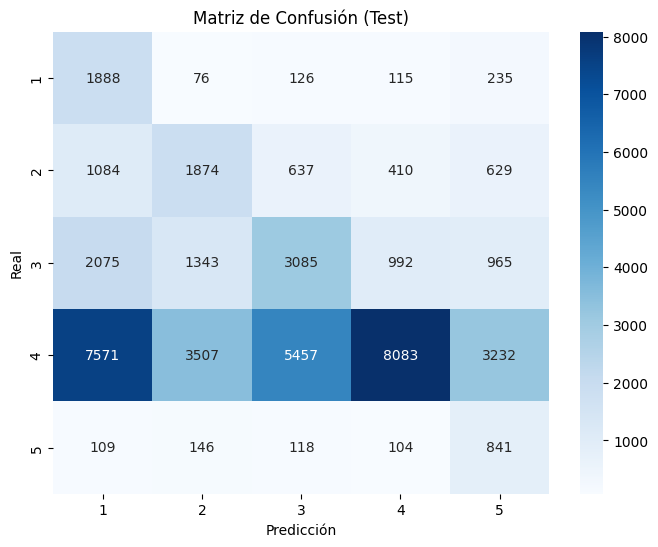

In [19]:
# Matriz de confusión
conf_matrix_val = confusion_matrix(y_train,  y_pred_train_rf_gs)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.title("Matriz de Confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

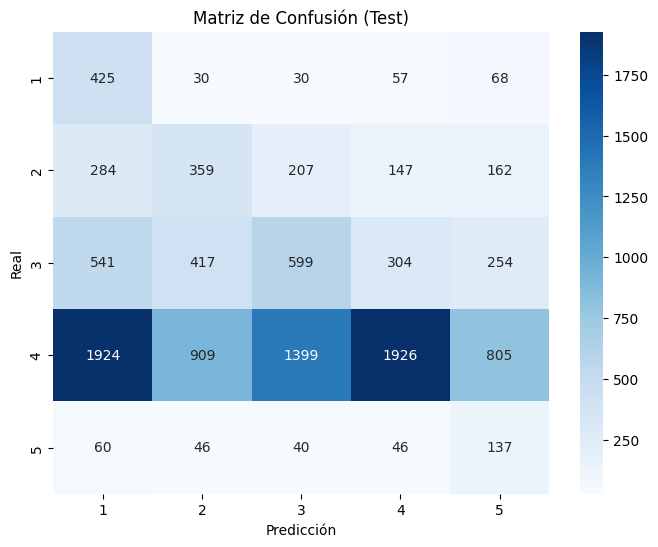

In [20]:
# Matriz de confusión
conf_matrix_val = confusion_matrix(y_test,  y_pred_rf_gs)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.title("Matriz de Confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [21]:
print("Report de Clasificación (train):")
print(classification_report(y_train, y_pred_train_rf_gs))

Report de Clasificación (train):
              precision    recall  f1-score   support

           1       0.15      0.77      0.25      2440
           2       0.27      0.40      0.32      4634
           3       0.33      0.36      0.35      8460
           4       0.83      0.29      0.43     27850
           5       0.14      0.64      0.23      1318

    accuracy                           0.35     44702
   macro avg       0.34      0.49      0.32     44702
weighted avg       0.62      0.35      0.39     44702



In [22]:
print("Report de Clasificación (test):")
print(classification_report(y_test, y_pred_rf_gs))

Report de Clasificación (test):
              precision    recall  f1-score   support

           1       0.13      0.70      0.22       610
           2       0.20      0.31      0.25      1159
           3       0.26      0.28      0.27      2115
           4       0.78      0.28      0.41      6963
           5       0.10      0.42      0.16       329

    accuracy                           0.31     11176
   macro avg       0.29      0.40      0.26     11176
weighted avg       0.56      0.31      0.35     11176



Segundo experimentos como más arboles y más deep